In [1]:
import pandas as pd
data=pd.read_csv('21stJun22_Plastic_Data.csv')
hdpe_data = data.head(294)
# hdpe_data
ldpe_data = data[587:]
# ldpe_data
data = [hdpe_data, ldpe_data]
data = pd.concat(data)
data = data.reset_index()
data.drop(columns='index', inplace=True)
dataset = data
dataset

,410.14,414.75,419.36,423.97,428.58,433.19,437.8,442.4,447,451.61,...,922.78,927.23,931.69,936.15,940.6,945.06,949.51,953.96,958.41,originalLabel
0,56.59,45.55,41.02,32.43,30.62,27.92,30.03,27.16,25.30,25.78,...,31.66,30.13,28.94,29.52,31.30,33.66,35.51,36.76,37.22,hdpe
1,65.88,58.97,58.88,53.22,55.89,57.67,58.82,56.37,56.90,57.04,...,55.13,52.46,50.55,51.68,54.58,57.63,59.59,61.19,61.65,hdpe
2,67.52,61.49,60.17,55.99,58.40,61.14,61.49,58.62,59.78,59.77,...,56.89,54.10,52.26,53.55,56.66,59.68,61.85,63.33,63.89,hdpe
3,70.14,61.52,61.86,57.40,60.73,62.62,62.99,60.33,60.94,61.00,...,57.52,54.64,52.96,54.23,57.62,60.59,62.72,64.41,65.07,hdpe
4,69.60,60.57,60.95,57.18,59.47,62.03,61.94,59.28,60.21,60.82,...,57.00,54.04,52.32,53.66,56.93,60.16,62.00,63.67,64.63,hdpe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,45.28,33.73,25.64,19.95,17.27,14.32,14.05,13.29,12.27,11.79,...,72.31,71.53,71.58,71.50,72.29,72.50,72.91,73.07,73.12,ldpe
557,79.05,55.45,48.17,41.09,39.89,35.32,33.08,33.46,30.93,31.09,...,51.93,50.00,49.24,50.31,53.01,55.31,56.54,57.57,57.99,ldpe
558,92.42,71.80,58.17,49.34,49.38,44.87,43.02,42.41,42.62,44.40,...,64.78,61.79,59.92,60.59,63.92,67.15,69.53,71.14,72.27,ldpe
559,89.35,65.97,63.94,54.21,52.94,50.90,52.32,50.60,52.52,55.75,...,72.02,71.89,71.14,71.24,71.62,71.78,71.69,72.00,72.20,ldpe


In [2]:
#check the shape of data
dataset.shape

(561, 123)

In [3]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (533, 123)
Unseen Data For Predictions: (28, 123)


In [4]:
from pycaret.classification import *

In [5]:
exp_clf101 = setup(data = data, target = 'originalLabel', session_id=123,  log_experiment = True) 

,Description,Value
0,session_id,123
1,Target,originalLabel
2,Target Type,Binary
3,Label Encoded,"hdpe: 0, ldpe: 1"
4,Original Data,"(533, 123)"
5,Missing Values,False
6,Numeric Features,122
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9090,0.9609,0.9294,0.8794,0.9033,0.8176,0.8194,0.0360
knn,K Neighbors Classifier,0.8902,0.9496,0.9294,0.8511,0.8857,0.7807,0.7890,0.1540
gbc,Gradient Boosting Classifier,0.8876,0.9469,0.9118,0.8526,0.8804,0.7746,0.7777,0.0120
lightgbm,Light Gradient Boosting Machine,0.8876,0.9458,0.9118,0.8554,0.8810,0.7750,0.7792,0.0100
rf,Random Forest Classifier,0.8849,0.9563,0.9059,0.8533,0.8779,0.7692,0.7720,0.0400
dt,Decision Tree Classifier,0.8743,0.8730,0.8588,0.8648,0.8597,0.7459,0.7486,0.0030
ada,Ada Boost Classifier,0.8607,0.9171,0.8882,0.8205,0.8529,0.7210,0.7234,0.0140
nb,Naive Bayes,0.8471,0.9062,0.9471,0.7761,0.8488,0.6975,0.7203,0.1640
ridge,Ridge Classifier,0.8444,0.0000,0.9471,0.7692,0.8461,0.6921,0.7133,0.0030
lda,Linear Discriminant Analysis,0.8444,0.8882,0.9471,0.7692,0.8461,0.6921,0.7133,0.0030


In [7]:
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9090,0.9609,0.9294,0.8794,0.9033,0.8176,0.8194,0.0350
knn,K Neighbors Classifier,0.8902,0.9496,0.9294,0.8511,0.8857,0.7807,0.7890,0.0060
gbc,Gradient Boosting Classifier,0.8876,0.9469,0.9118,0.8526,0.8804,0.7746,0.7777,0.0120
lightgbm,Light Gradient Boosting Machine,0.8876,0.9458,0.9118,0.8554,0.8810,0.7750,0.7792,0.0090
rf,Random Forest Classifier,0.8849,0.9563,0.9059,0.8533,0.8779,0.7692,0.7720,0.0400
dt,Decision Tree Classifier,0.8743,0.8730,0.8588,0.8648,0.8597,0.7459,0.7486,0.0030
ada,Ada Boost Classifier,0.8607,0.9171,0.8882,0.8205,0.8529,0.7210,0.7234,0.0130
nb,Naive Bayes,0.8471,0.9062,0.9471,0.7761,0.8488,0.6975,0.7203,0.0030
ridge,Ridge Classifier,0.8444,0.0000,0.9471,0.7692,0.8461,0.6921,0.7133,0.0030
lda,Linear Discriminant Analysis,0.8444,0.8882,0.9471,0.7692,0.8461,0.6921,0.7133,0.0030


In [8]:
print(best_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


In [9]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [10]:
the_model = create_model('et', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9737,0.9860,1.0000,0.9444,0.9714,0.9471,0.9484
1,0.8421,0.9216,0.8824,0.7895,0.8333,0.6842,0.6880
2,0.8421,0.9034,0.8824,0.7895,0.8333,0.6842,0.6880
3,0.9730,0.9868,1.0000,0.9444,0.9714,0.9458,0.9472
4,0.8649,0.9529,0.8824,0.8333,0.8571,0.7291,0.7302
5,0.9459,0.9956,1.0000,0.8947,0.9444,0.8921,0.8974
6,0.8649,0.9544,0.8824,0.8333,0.8571,0.7291,0.7302
7,0.9459,0.9794,0.9412,0.9412,0.9412,0.8912,0.8912
8,0.9459,0.9912,0.9412,0.9412,0.9412,0.8912,0.8912


In [11]:
bagged_et = ensemble_model(the_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9474,0.9860,1.0000,0.8947,0.9444,0.8947,0.8997
1,0.8421,0.9384,0.8824,0.7895,0.8333,0.6842,0.6880
2,0.8158,0.9244,0.8824,0.7500,0.8108,0.6336,0.6416
3,0.9730,0.9912,1.0000,0.9444,0.9714,0.9458,0.9472
4,0.8649,0.9544,0.8824,0.8333,0.8571,0.7291,0.7302
5,0.9189,1.0000,1.0000,0.8500,0.9189,0.8389,0.8500
6,0.8649,0.9706,0.8824,0.8333,0.8571,0.7291,0.7302
7,0.9459,0.9706,0.9412,0.9412,0.9412,0.8912,0.8912
8,0.9730,0.9971,1.0000,0.9444,0.9714,0.9458,0.9472


In [12]:
print(bagged_et)

BaggingClassifier(base_estimator=ExtraTreesClassifier(bootstrap=False,
                                                      ccp_alpha=0.0,
                                                      class_weight=None,
                                                      criterion='gini',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      max_samples=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                              

In [13]:
the_model = tune_model(the_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8947,0.9552,1.0000,0.8095,0.8947,0.7918,0.8095
1,0.8684,0.9608,1.0000,0.7727,0.8718,0.7411,0.7673
2,0.8421,0.9440,1.0000,0.7391,0.8500,0.6911,0.7266
3,0.9189,0.9676,1.0000,0.8500,0.9189,0.8389,0.8500
4,0.8649,0.9618,0.9412,0.8000,0.8649,0.7315,0.7412
5,0.8919,0.9735,1.0000,0.8095,0.8947,0.7861,0.8047
6,0.8649,0.9294,1.0000,0.7727,0.8718,0.7338,0.7613
7,0.9189,0.9618,1.0000,0.8500,0.9189,0.8389,0.8500
8,0.9189,0.9912,1.0000,0.8500,0.9189,0.8389,0.8500


In [14]:
boosted_et = ensemble_model(the_model, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9474,0.9748,0.9412,0.9412,0.9412,0.8936,0.8936
1,0.8421,0.9356,0.8824,0.7895,0.8333,0.6842,0.6880
2,0.8684,0.9328,1.0000,0.7727,0.8718,0.7411,0.7673
3,0.9459,0.9971,1.0000,0.8947,0.9444,0.8921,0.8974
4,0.8649,0.9471,0.8824,0.8333,0.8571,0.7291,0.7302
5,0.9189,0.9941,1.0000,0.8500,0.9189,0.8389,0.8500
6,0.8649,0.9618,0.8824,0.8333,0.8571,0.7291,0.7302
7,0.9459,0.9706,0.9412,0.9412,0.9412,0.8912,0.8912
8,0.9730,0.9971,1.0000,0.9444,0.9714,0.9458,0.9472


In [15]:
bagged_dt2 = ensemble_model(the_model, n_estimators=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8947,0.9524,1.0000,0.8095,0.8947,0.7918,0.8095
1,0.8684,0.9636,1.0000,0.7727,0.8718,0.7411,0.7673
2,0.8421,0.9440,1.0000,0.7391,0.8500,0.6911,0.7266
3,0.8649,0.9559,1.0000,0.7727,0.8718,0.7338,0.7613
4,0.8378,0.9500,0.9412,0.7619,0.8421,0.6792,0.6953
5,0.8919,0.9706,1.0000,0.8095,0.8947,0.7861,0.8047
6,0.8108,0.9176,1.0000,0.7083,0.8293,0.6305,0.6785
7,0.8919,0.9559,1.0000,0.8095,0.8947,0.7861,0.8047
8,0.8919,0.9912,1.0000,0.8095,0.8947,0.7861,0.8047


In [16]:
# train individual models to blend
et = create_model('et', verbose = False)
knn = create_model('knn', verbose = False)
gbc = create_model('gbc', verbose = False)

In [17]:
# blend individual models
blend_soft = blend_models(estimator_list = [et, knn, gbc], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9211,0.9804,0.9412,0.8889,0.9143,0.8412,0.8424
1,0.8421,0.9328,0.8824,0.7895,0.8333,0.6842,0.6880
2,0.8421,0.8992,0.9412,0.7619,0.8421,0.6877,0.7031
3,0.9459,0.9882,1.0000,0.8947,0.9444,0.8921,0.8974
4,0.8649,0.9529,0.8824,0.8333,0.8571,0.7291,0.7302
5,0.9189,0.9971,1.0000,0.8500,0.9189,0.8389,0.8500
6,0.8378,0.9706,0.8824,0.7895,0.8333,0.6764,0.6804
7,0.9459,0.9824,0.9412,0.9412,0.9412,0.8912,0.8912
8,0.9730,0.9941,1.0000,0.9444,0.9714,0.9458,0.9472


In [18]:
# blend individual models
blend_hard = blend_models(estimator_list = [et, knn, gbc], method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9474,0.0000,1.0000,0.8947,0.9444,0.8947,0.8997
1,0.8421,0.0000,0.8824,0.7895,0.8333,0.6842,0.6880
2,0.8158,0.0000,0.8824,0.7500,0.8108,0.6336,0.6416
3,0.9730,0.0000,1.0000,0.9444,0.9714,0.9458,0.9472
4,0.8649,0.0000,0.8824,0.8333,0.8571,0.7291,0.7302
5,0.9189,0.0000,1.0000,0.8500,0.9189,0.8389,0.8500
6,0.8378,0.0000,0.8824,0.7895,0.8333,0.6764,0.6804
7,0.9459,0.0000,0.9412,0.9412,0.9412,0.8912,0.8912
8,0.9459,0.0000,1.0000,0.8947,0.9444,0.8921,0.8974


In [19]:
# blend top3 models from compare_models
blender_top3 = blend_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9211,0.9804,0.9412,0.8889,0.9143,0.8412,0.8424
1,0.8421,0.9328,0.8824,0.7895,0.8333,0.6842,0.6880
2,0.8421,0.8992,0.9412,0.7619,0.8421,0.6877,0.7031
3,0.9459,0.9882,1.0000,0.8947,0.9444,0.8921,0.8974
4,0.8649,0.9529,0.8824,0.8333,0.8571,0.7291,0.7302
5,0.9189,0.9971,1.0000,0.8500,0.9189,0.8389,0.8500
6,0.8378,0.9706,0.8824,0.7895,0.8333,0.6764,0.6804
7,0.9459,0.9824,0.9412,0.9412,0.9412,0.8912,0.8912
8,0.9730,0.9941,1.0000,0.9444,0.9714,0.9458,0.9472


In [20]:
print(blender_top3.estimators_)

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_imp

In [21]:
# stacking
stack_soft = stack_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9474,0.9804,1.0000,0.8947,0.9444,0.8947,0.8997
1,0.8421,0.9412,0.8824,0.7895,0.8333,0.6842,0.6880
2,0.8158,0.9048,0.8824,0.7500,0.8108,0.6336,0.6416
3,0.9189,0.9794,0.9412,0.8889,0.9143,0.8375,0.8387
4,0.8649,0.9500,0.8824,0.8333,0.8571,0.7291,0.7302
5,0.9189,0.9853,1.0000,0.8500,0.9189,0.8389,0.8500
6,0.8378,0.9500,0.8824,0.7895,0.8333,0.6764,0.6804
7,0.9459,0.9794,0.9412,0.9412,0.9412,0.8912,0.8912
8,0.9189,0.9912,0.9412,0.8889,0.9143,0.8375,0.8387


In [22]:
et = create_model('et')
stack_soft2 = stack_models(top3, meta_model=et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9211,0.9846,0.9412,0.8889,0.9143,0.8412,0.8424
1,0.8684,0.9370,0.8824,0.8333,0.8571,0.7354,0.7364
2,0.8421,0.8852,0.9412,0.7619,0.8421,0.6877,0.7031
3,0.9189,0.9765,0.9412,0.8889,0.9143,0.8375,0.8387
4,0.9189,0.9544,0.9412,0.8889,0.9143,0.8375,0.8387
5,0.9459,0.9779,1.0000,0.8947,0.9444,0.8921,0.8974
6,0.8378,0.9456,0.9412,0.7619,0.8421,0.6792,0.6953
7,0.8378,0.9647,0.7647,0.8667,0.8125,0.6706,0.6747
8,0.8919,0.9824,1.0000,0.8095,0.8947,0.7861,0.8047


In [23]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9737,0.9860,1.0000,0.9444,0.9714,0.9471,0.9484
1,0.8421,0.9216,0.8824,0.7895,0.8333,0.6842,0.6880
2,0.8421,0.9034,0.8824,0.7895,0.8333,0.6842,0.6880
3,0.9730,0.9868,1.0000,0.9444,0.9714,0.9458,0.9472
4,0.8649,0.9529,0.8824,0.8333,0.8571,0.7291,0.7302
5,0.9459,0.9956,1.0000,0.8947,0.9444,0.8921,0.8974
6,0.8649,0.9544,0.8824,0.8333,0.8571,0.7291,0.7302
7,0.9459,0.9794,0.9412,0.9412,0.9412,0.8912,0.8912
8,0.9459,0.9912,0.9412,0.9412,0.9412,0.8912,0.8912


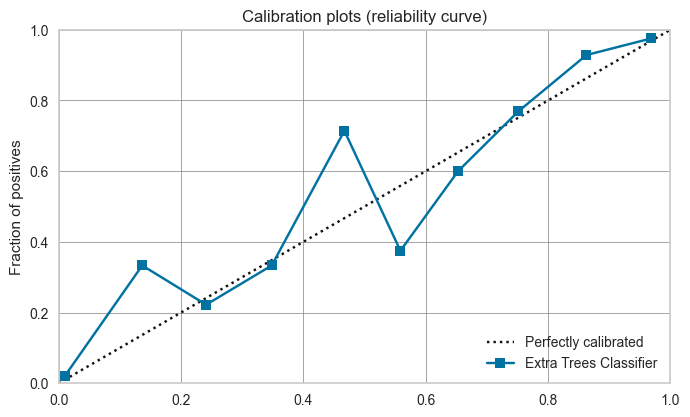

In [24]:
plot_model(et, plot='calibration')

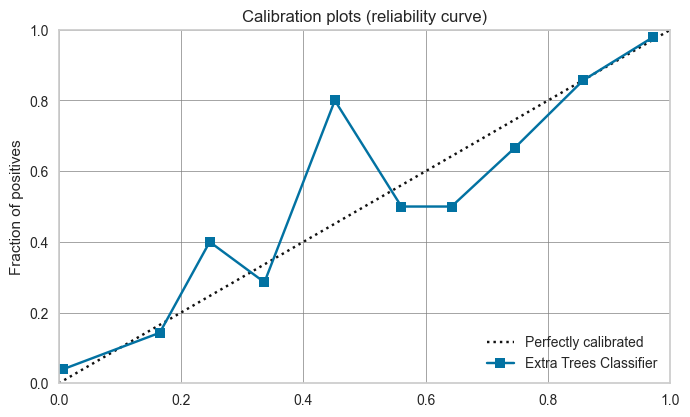

In [25]:
calibrated_et = calibrate_model(et)
plot_model(calibrated_et, plot='calibration')

In [26]:
calibrated_et_isotonic = calibrate_model(et, method = 'isotonic')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9474,0.9804,0.9412,0.9412,0.9412,0.8936,0.8936
1,0.8158,0.9244,0.8235,0.7778,0.8000,0.6295,0.6304
2,0.8158,0.9090,0.8824,0.7500,0.8108,0.6336,0.6416
3,0.9459,0.9912,0.9412,0.9412,0.9412,0.8912,0.8912
4,0.8649,0.9559,0.8824,0.8333,0.8571,0.7291,0.7302
5,0.9730,1.0000,1.0000,0.9444,0.9714,0.9458,0.9472
6,0.8649,0.9515,0.8235,0.8750,0.8485,0.7267,0.7278
7,0.9459,0.9706,0.9412,0.9412,0.9412,0.8912,0.8912
8,0.9459,0.9941,0.9412,0.9412,0.9412,0.8912,0.8912


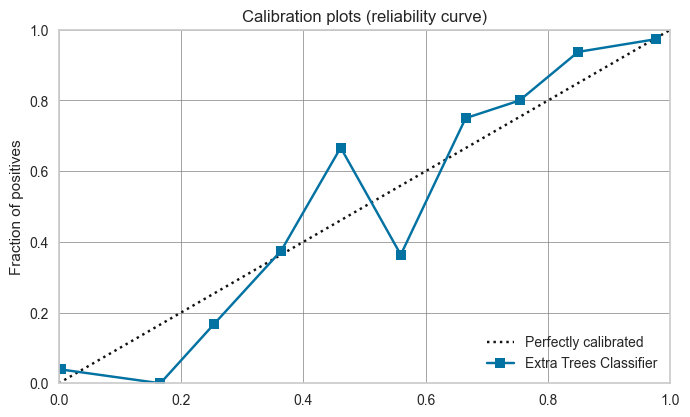

In [27]:
plot_model(calibrated_et_isotonic, plot='calibration')

In [28]:
#tuned model object is stored in the variable 'tuned_dt'. 
the_model = create_model('et')
print(the_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9737,0.9860,1.0000,0.9444,0.9714,0.9471,0.9484
1,0.8421,0.9216,0.8824,0.7895,0.8333,0.6842,0.6880
2,0.8421,0.9034,0.8824,0.7895,0.8333,0.6842,0.6880
3,0.9730,0.9868,1.0000,0.9444,0.9714,0.9458,0.9472
4,0.8649,0.9529,0.8824,0.8333,0.8571,0.7291,0.7302
5,0.9459,0.9956,1.0000,0.8947,0.9444,0.8921,0.8974
6,0.8649,0.9544,0.8824,0.8333,0.8571,0.7291,0.7302
7,0.9459,0.9794,0.9412,0.9412,0.9412,0.8912,0.8912
8,0.9459,0.9912,0.9412,0.9412,0.9412,0.8912,0.8912


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


# 10.0 Plot a Model

Before model finalization, the `plot_model()` function can be used to analyze the performance across different aspects such as AUC, confusion_matrix, decision boundary etc. This function takes a trained model object and returns a plot based on the test / hold-out set. 

There are 15 different plots available, please see the `plot_model()` docstring for the list of available plots.

### 10.1 AUC Plot

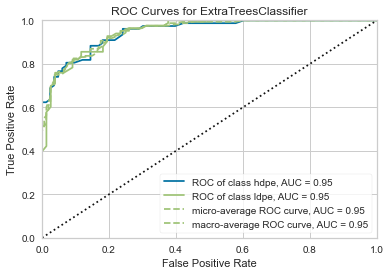

In [29]:
plot_model(the_model, plot = 'auc')

### 10.2 Precision-Recall Curve

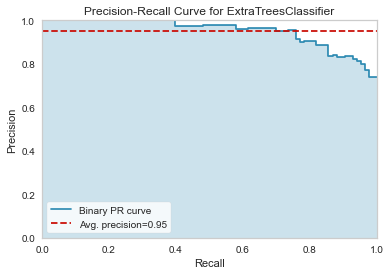

In [30]:
plot_model(the_model, plot = 'pr')

### 10.3 Feature Importance Plot

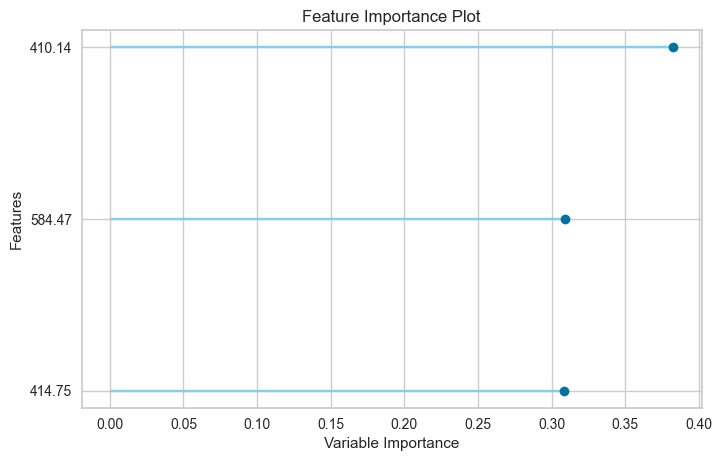

In [31]:
plot_model(the_model, plot='feature')

### 10.4 Confusion Matrix

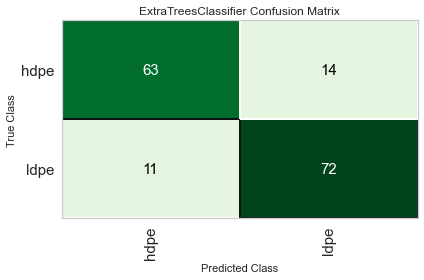

In [32]:
plot_model(the_model, plot = 'confusion_matrix')

*Another* way to analyze the performance of models is to use the `evaluate_model()` function which displays a user interface for all of the available plots for a given model. It internally uses the `plot_model()` function. 

In [33]:
evaluate_model(the_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 11.0 Predict on test / hold-out Sample

In [34]:
predict_model(the_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8438,0.9484,0.8675,0.8372,0.8521,0.6866,0.6871


# 12.0 Finalize Model for Deployment

In [35]:
the_model = finalize_model(the_model)

In [36]:
#Final Random Forest model parameters for deployment
print(the_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


In [37]:
predict_model(the_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


# 13.0 Predict on unseen data

In [38]:
import pandas as pd
data_unseen

,410.14,414.75,419.36,423.97,428.58,433.19,437.8,442.4,447,451.61,...,922.78,927.23,931.69,936.15,940.6,945.06,949.51,953.96,958.41,originalLabel
0,72.06,61.77,60.82,57.37,60.47,62.92,61.93,59.81,60.95,60.79,...,57.16,54.27,52.57,53.89,57.43,60.61,62.48,64.09,64.88,hdpe
1,80.50,75.22,78.10,73.49,78.53,78.22,77.60,77.92,79.59,79.01,...,74.15,71.13,68.73,70.10,73.50,76.79,79.18,80.70,80.97,hdpe
2,55.53,49.97,47.64,43.08,44.49,49.68,50.87,46.10,47.13,47.77,...,45.84,43.21,41.53,42.91,45.81,48.78,50.88,52.54,53.01,hdpe
3,51.32,39.93,35.63,30.20,29.74,31.94,33.31,29.08,29.21,30.93,...,36.23,34.74,33.75,34.66,36.48,38.47,39.77,40.74,41.30,hdpe
4,93.56,80.08,76.89,72.01,73.61,74.91,73.48,73.49,76.64,77.48,...,79.69,77.64,76.57,77.58,80.03,82.07,83.66,84.81,85.03,hdpe
5,47.81,34.71,28.16,23.07,21.12,21.27,21.84,18.29,17.27,18.02,...,26.12,24.90,23.88,24.63,26.28,28.10,29.18,30.00,30.58,hdpe
6,98.06,88.49,83.54,79.43,78.60,75.67,77.29,77.80,80.85,82.13,...,89.85,87.94,87.12,88.61,91.33,93.76,95.47,96.76,97.21,hdpe
7,46.44,34.60,28.32,24.14,22.27,23.26,24.37,20.56,20.59,20.94,...,26.86,25.76,24.96,25.74,26.89,28.44,29.35,30.23,30.38,hdpe
8,46.62,32.81,26.41,21.10,18.40,19.49,18.77,15.19,14.34,14.06,...,16.09,15.14,14.50,15.25,16.34,17.55,18.50,19.32,19.96,hdpe
9,112.78,98.81,94.81,90.09,90.76,87.70,89.66,90.77,94.45,96.49,...,104.40,102.37,101.55,102.87,105.66,108.09,110.26,111.22,111.63,hdpe


In [39]:
unseen_predictions = predict_model(the_model, data=data_unseen)
unseen_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0,0.9949,0,0,0,0,0


,410.14,414.75,419.36,423.97,428.58,433.19,437.8,442.4,447,451.61,...,931.69,936.15,940.6,945.06,949.51,953.96,958.41,originalLabel,Label,Score
0,72.06,61.77,60.82,57.37,60.47,62.92,61.93,59.81,60.95,60.79,...,52.57,53.89,57.43,60.61,62.48,64.09,64.88,hdpe,hdpe,1.00
1,80.50,75.22,78.10,73.49,78.53,78.22,77.60,77.92,79.59,79.01,...,68.73,70.10,73.50,76.79,79.18,80.70,80.97,hdpe,hdpe,1.00
2,55.53,49.97,47.64,43.08,44.49,49.68,50.87,46.10,47.13,47.77,...,41.53,42.91,45.81,48.78,50.88,52.54,53.01,hdpe,hdpe,0.81
3,51.32,39.93,35.63,30.20,29.74,31.94,33.31,29.08,29.21,30.93,...,33.75,34.66,36.48,38.47,39.77,40.74,41.30,hdpe,hdpe,0.71
4,93.56,80.08,76.89,72.01,73.61,74.91,73.48,73.49,76.64,77.48,...,76.57,77.58,80.03,82.07,83.66,84.81,85.03,hdpe,hdpe,1.00
5,47.81,34.71,28.16,23.07,21.12,21.27,21.84,18.29,17.27,18.02,...,23.88,24.63,26.28,28.10,29.18,30.00,30.58,hdpe,ldpe,0.52
6,98.06,88.49,83.54,79.43,78.60,75.67,77.29,77.80,80.85,82.13,...,87.12,88.61,91.33,93.76,95.47,96.76,97.21,hdpe,hdpe,1.00
7,46.44,34.60,28.32,24.14,22.27,23.26,24.37,20.56,20.59,20.94,...,24.96,25.74,26.89,28.44,29.35,30.23,30.38,hdpe,hdpe,0.52
8,46.62,32.81,26.41,21.10,18.40,19.49,18.77,15.19,14.34,14.06,...,14.50,15.25,16.34,17.55,18.50,19.32,19.96,hdpe,ldpe,0.71
9,112.78,98.81,94.81,90.09,90.76,87.70,89.66,90.77,94.45,96.49,...,101.55,102.87,105.66,108.09,110.26,111.22,111.63,hdpe,hdpe,1.00


The `Label` and `Score` columns are added onto the `data_unseen` set. Label is the prediction and score is the probability of the prediction. Notice that predicted results are concatenated to the original dataset while all the transformations are automatically performed in the background. You can also check the metrics on this since you have actual target column `default` available. To do that we will use `pycaret.utils` module. See example below:

In [40]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['originalLabel'], unseen_predictions['Label'], metric = 'Accuracy')

0.9286

# 14.0 Saving the model

We have now finished the experiment by finalizing the `tuned_rf` model which is now stored in `final_rf` variable. We have also used the model stored in `final_rf` to predict `data_unseen`. This brings us to the end of our experiment, but one question is still to be asked: What happens when you have more new data to predict? Do you have to go through the entire experiment again? The answer is no, PyCaret's inbuilt function `save_model()` allows you to save the model along with entire transformation pipeline for later use.

In [41]:
save_model(the_model,'models/Final ET Model HDPE_LDPE 21stJune2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='originalLabel',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeri...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
            

(TIP : It's always good to use date in the filename when saving models, it's good for version control.)

# 15.0 Loading the saved model

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's `load_model()` function and then easily apply the saved model on new unseen data for prediction.

In [42]:
the_model = load_model('models/Final ET Model HDPE_LDPE 21stJune2022')

Transformation Pipeline and Model Successfully Loaded


Once the model is loaded in the environment, you can simply use it to predict on any new data using the same `predict_model()` function. Below we have applied the loaded model to predict the same `data_unseen` that we used in section 13 above.

In [43]:
new_prediction = predict_model(the_model, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0,0.9949,0,0,0,0,0


In [44]:
new_prediction

,410.14,414.75,419.36,423.97,428.58,433.19,437.8,442.4,447,451.61,...,931.69,936.15,940.6,945.06,949.51,953.96,958.41,originalLabel,Label,Score
0,72.06,61.77,60.82,57.37,60.47,62.92,61.93,59.81,60.95,60.79,...,52.57,53.89,57.43,60.61,62.48,64.09,64.88,hdpe,hdpe,1.00
1,80.50,75.22,78.10,73.49,78.53,78.22,77.60,77.92,79.59,79.01,...,68.73,70.10,73.50,76.79,79.18,80.70,80.97,hdpe,hdpe,1.00
2,55.53,49.97,47.64,43.08,44.49,49.68,50.87,46.10,47.13,47.77,...,41.53,42.91,45.81,48.78,50.88,52.54,53.01,hdpe,hdpe,0.81
3,51.32,39.93,35.63,30.20,29.74,31.94,33.31,29.08,29.21,30.93,...,33.75,34.66,36.48,38.47,39.77,40.74,41.30,hdpe,hdpe,0.71
4,93.56,80.08,76.89,72.01,73.61,74.91,73.48,73.49,76.64,77.48,...,76.57,77.58,80.03,82.07,83.66,84.81,85.03,hdpe,hdpe,1.00
5,47.81,34.71,28.16,23.07,21.12,21.27,21.84,18.29,17.27,18.02,...,23.88,24.63,26.28,28.10,29.18,30.00,30.58,hdpe,ldpe,0.52
6,98.06,88.49,83.54,79.43,78.60,75.67,77.29,77.80,80.85,82.13,...,87.12,88.61,91.33,93.76,95.47,96.76,97.21,hdpe,hdpe,1.00
7,46.44,34.60,28.32,24.14,22.27,23.26,24.37,20.56,20.59,20.94,...,24.96,25.74,26.89,28.44,29.35,30.23,30.38,hdpe,hdpe,0.52
8,46.62,32.81,26.41,21.10,18.40,19.49,18.77,15.19,14.34,14.06,...,14.50,15.25,16.34,17.55,18.50,19.32,19.96,hdpe,ldpe,0.71
9,112.78,98.81,94.81,90.09,90.76,87.70,89.66,90.77,94.45,96.49,...,101.55,102.87,105.66,108.09,110.26,111.22,111.63,hdpe,hdpe,1.00


Notice that the results of `unseen_predictions` and `new_prediction` are identical.

In [45]:
from pycaret.utils import check_metric
check_metric(new_prediction['originalLabel'], new_prediction['Label'], metric = 'Accuracy')

0.9286